In [24]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

In [25]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [26]:
# get data
series = pd.read_csv('catfish.csv', index_col=0)

series.index = pd.to_datetime(series.index)
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()
series

,Total
Date,
2004-03-01,-1067.0
2004-04-01,-4131.0
2004-05-01,3543.0
2004-06-01,401.0
2004-07-01,-405.0
...,...
2012-08-01,353.0
2012-09-01,-2186.0
2012-10-01,1393.0


In [27]:
#check stationarity
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


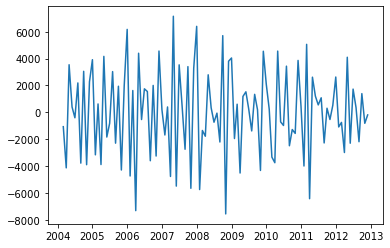

In [28]:
plt.plot(series)

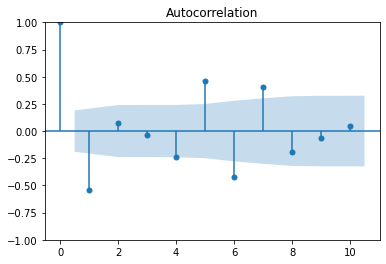

In [31]:
plot_acf(series, lags=10)
plt.show()

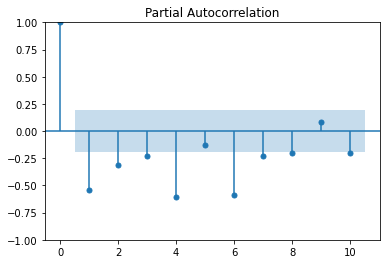

In [34]:
plot_pacf(series, lags=10)
plt.show()

# Either AR(1), AR(4), AR(6), or AR(10)

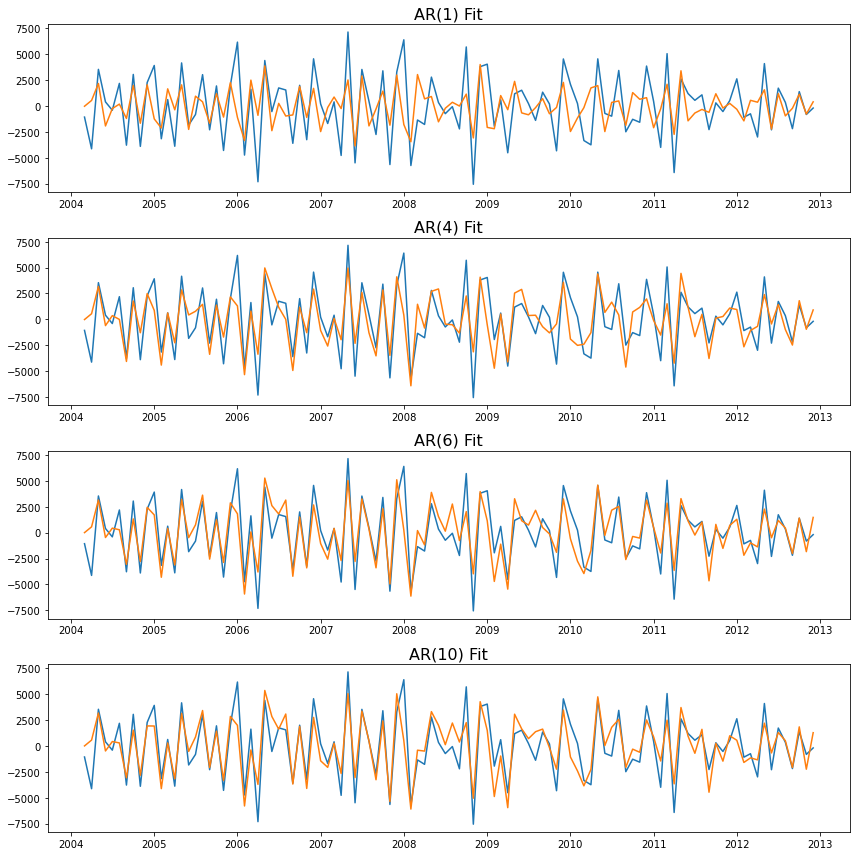

In [13]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

# Each model has: 

## a log likelihood ($l$)
## a number of parameters ($k$)
## a number of samples used for fitting ($n$)

# AIC = 2$k$ - 2$l$

## Lower AIC via higher log likelihood or less parameters

# BIC = $\ln(n)k$ - 2$l$

## Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [14]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.6099852660482
AIC for AR(6): 1899.6497441881806
AIC for AR(10): 1902.376545021699


## Based on AIC criteria, pick AR(6)

In [15]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.5906198307205
BIC for AR(6): 1920.9572569410773
BIC for AR(10): 1934.3378141510439


## Based on BIC criteria, pick AR(6)